# Метод Внешнего Штрафа
$$ $$
$$ \left(\begin{array}{ccc}x_{new}\\y_{new}\\\end{array}\right) = \left(\begin{array}{ccc}x\\y\\\end{array}\right) - \frac{1}{L}  ∇S_γ(x, y)$$

### Функция и ее градиент 

$$ f(x,y)=3x^2+13y^2 $$

$$ \frac{df}{dx} = 6x $$



$$ \frac{df}{dy} = 26y $$

$$ ∇f = (6x, 26y)^{T} $$

In [2]:
def func(x, y):
    return 3 * x**2 + 13 * y**2

In [3]:
def derivative_func(x, y):
    return (6 * x, 26 * y)
    

### Ограничения

$$x - y >= 1$$
$$ y >= 2 $$

### Функция штрафа 

$$S_γ(x, y) = f(x, y) + γ * (c_1 * (max[0, 1 - x + y])^p + c_2 * (max[0, 2 - y]) ^ p) $$

$$ S_γ(x, y) = f(x, y) + γ * ((max[0, 1 - x + y])^2 + (max[0, 2 - y]) ^ 2) $$  $$ при$$  $$c_1 = c_2 = 1, p = 2$$

In [4]:
def S_gam(x, y, gam):
    return func(x, y) + gam * (max(0, 1 - x + y) ** 2 + (max(0, 2 - y)) ** 2)

### Градиент функции штрафа

In [5]:
def S_gam_derivative(x, y, gam):
    
    if (x - y >= 1) and (y >= 2):
        return (6 * x, 26 * y)
        
    
    elif not(x - y >= 1) and (y >= 2):
        return (6 * x + gam * 2 *(-1 + x - y),  26 * y + 2 *gam * (1 - x + y))
    
        
    elif (x - y >= 1) and not(y >= 2):
        return (6 * x, 26 * y + 2 * gam * (y - 2))
        
    elif not(x - y >= 1) and not(y >= 2):
        return (6 * x + gam * 2 * (-1 + x -y), 26 * y + 2 * gam * (-1 + 2*y - x))
        

##### модуль градиента

In [6]:
def nablaLength(x_0, y_0):
    return (x_0 ** 2 + y_0 ** 2) ** 0.5

### Длина Шага градиентного спуска 

(в самом плохом случае) $$ S_γ(x, y) = f(x, y) + γ * (x^2 - 2 x y - 2 x + y^2 + 2 y + 1 + 4 - 4y + y^2) $$ 

 $$ S_γ(x, y) = f(x, y) + γ * (x^2 - 2 x y - 2 x + 2 y^2 - 2 y + 5) $$ 

$$L = max( 2 (3 + γ), 2 (13 + 2γ)) = max(6 + 2γ, 26 + 4γ) = 26 + 4γ$$
 
 $$\frac{1}{L} = \frac{1} {26 + 4γ}$$


# Градиентный спуск

In [7]:
def GD(x, y, gam):
    t = 1/(26 + 4 * gam)
    k = 0
    x_0, y_0 = S_gam_derivative(x, y, gam)
    while (nablaLength(x_0, y_0) > 0.1):
        k += 1
        x_0, y_0 = S_gam_derivative(x, y, gam)
        x -= t * x_0
        y -= t * y_0
        
#         print(x, y)
    return (x, y, k)
        

# Заданиe

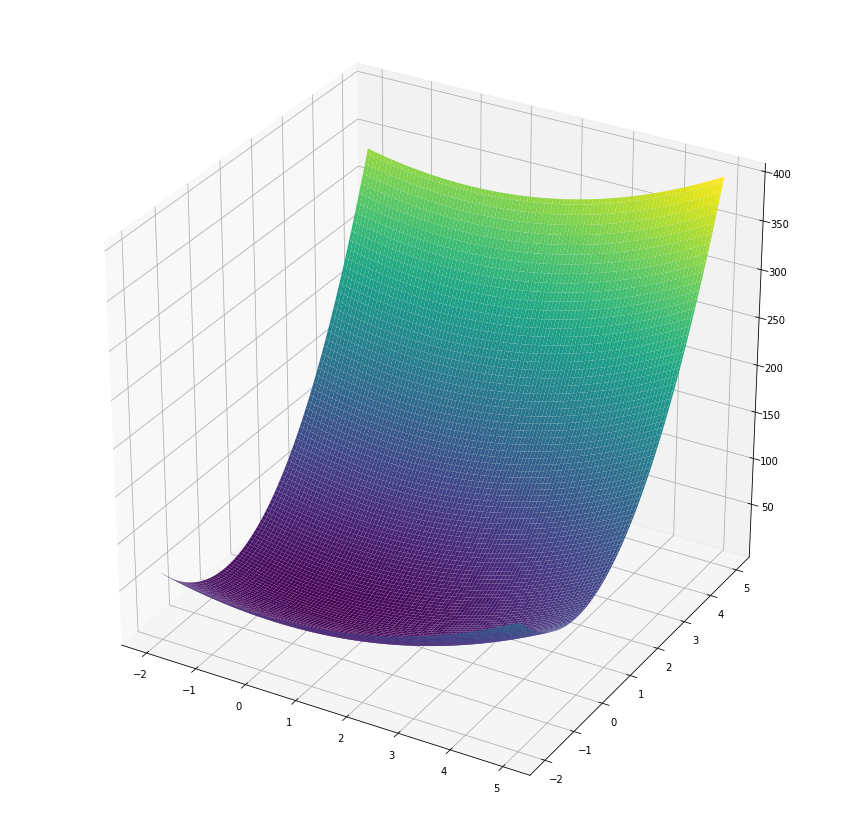

In [8]:
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from matplotlib import cm
import matplotlib.pyplot as plt
%matplotlib inline
# уравнение поверхности
# создаём полотно для рисунка
fig = plt.figure(figsize = (15, 15))
# создаём рисунок пространства с поверхностью
ax = fig.add_subplot(1, 1, 1, projection = '3d')
# размечаем границы осей для аргументов
xval = np.linspace(-2, 5, 200)
yval = np.linspace(-2, 5, 200)
# создаём массив с xval столбцами и yval строками
# - в этом массиве будут храниться значения z
x, y = np.meshgrid(xval, yval)
# приравниваем z к функции от x и y 
z = func(x, y)
# создаём поверхность
surf = ax.plot_surface(
# отмечаем аргументы и уравнение поверхности
x, y, z, 
# шаг прорисовки сетки
# - чем меньше значение, тем плавнее
# - будет градиент на поверхности
rstride = 2,
cstride = 2,
cmap = cm.viridis)

In [9]:
x = -2
y = -2

for power in range(0, 10):
    print('gamma = ', 2 ** power, GD(x, y, 2 ** power))

gamma =  1 (0.2633275134256373, 0.08403712368359072, 19)
gamma =  2 (0.4630354836704103, 0.17184956071190116, 19)
gamma =  4 (0.7576369066491263, 0.3343583368848804, 19)
gamma =  8 (1.1576642893661429, 0.5948922002254127, 22)
gamma =  16 (1.6265913679320985, 0.9335630826279152, 25)
gamma =  32 (2.08560150228971, 1.2821077753478698, 30)
gamma =  64 (2.450776048386767, 1.5661740680187308, 35)
gamma =  128 (2.694506832341439, 1.7579097988420813, 40)
gamma =  256 (2.8381593528714184, 1.8715274875773131, 45)
gamma =  512 (2.916550336336211, 1.9337058441867738, 48)


### Дополнительно 

In [10]:
def GD_bonus(x, y, gam):
    all_x = []
    all_y = []
    
    t = 1/(26 + 4 * gam)
    k = 0
    x_0, y_0 = S_gam_derivative(x, y, gam)
    while (nablaLength(x_0, y_0) > 0.01):
        all_x.append(x)
        all_y.append(y)
        x_0, y_0 = S_gam_derivative(x, y, gam)
        k += 1
        x -= t * x_0
        y -= t * y_0
        
    return (all_x, all_y)

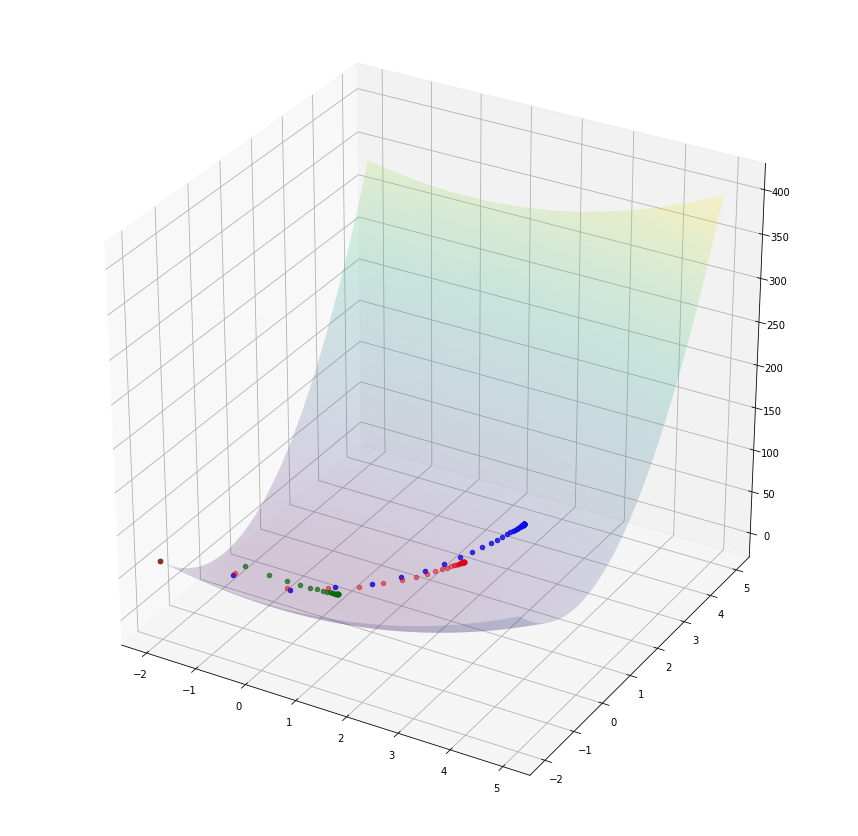

In [13]:


fig = plt.figure(figsize = (15, 15))
# создаём рисунок пространства с поверхностью
ax = fig.add_subplot(1, 1, 1, projection = '3d')

x, y = GD_bonus(-2, -2, 512)
z = []
for i in range(len(x)):
    z.append(func(x[i], y[i]))
ax.scatter3D(x, y, z, color = 'blue', depthshade=False, alpha = 0.8)

x, y = GD_bonus(-2, -2, 1)
z = []
for i in range(len(x)):
    z.append(func(x[i], y[i]))
ax.scatter3D(x, y, z, color = 'green', depthshade=False, alpha = 0.7)

x, y = GD_bonus(-2, -2, 32)
z = []
for i in range(len(x)):
    z.append(func(x[i], y[i]))
ax.scatter3D(x, y, z, color = 'red', depthshade=False, alpha = 0.5)

# размечаем границы осей для аргументов
xval = np.linspace(-2, 5, 400)
yval = np.linspace(-2, 5, 400)
# создаём массив с xval столбцами и yval строками
# - в этом массиве будут храниться значения z
x, y = np.meshgrid(xval, yval)
# приравниваем z к функции от x и y 
z = func(x, y)
# создаём поверхность
surf = ax.plot_surface(
# отмечаем аргументы и уравнение поверхности
x, y, z, 
# шаг прорисовки сетки
# - чем меньше значение, тем плавнее
# - будет градиент на поверхности
rstride = 3,
cstride = 3,
cmap = cm.viridis, 
alpha = 0.2)

